### BLIP2 image captioning

/Users/aordorica/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.55s/it]


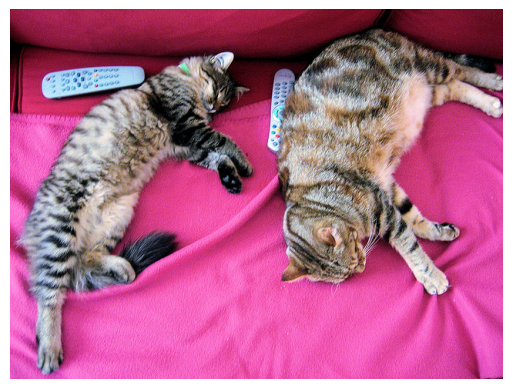

/Users/aordorica/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: two cats laying on a couch



'two cats laying on a couch\n'

In [1]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Load the model and processor
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")
model.to(device)

def caption_and_display_image(model, processor, device, image_path=None, image_url=None):
    # Check inputs
    if image_path is None and image_url is None:
        raise ValueError("Either image_path or image_url must be provided.")
    
    # Load image from the path or URL
    if image_path is not None:
        image = Image.open(image_path)
    else:
        image = Image.open(requests.get(image_url, stream=True).raw)

    # Display the image
    plt.imshow(image)
    plt.axis("off")  # Hide the axis
    plt.show()

    # Preprocess the image
    inputs = processor(text=None, images=image, return_tensors="pt", padding=True)

    # Move the preprocessed inputs to the device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate captions
    outputs = model.generate(**inputs)

    # Decode and return the caption
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    print("Generated Caption:", caption)
    return caption

# Example usage:
# Caption an image from a URL
caption_and_display_image(model, processor, device, image_url="http://images.cocodataset.org/val2017/000000039769.jpg")


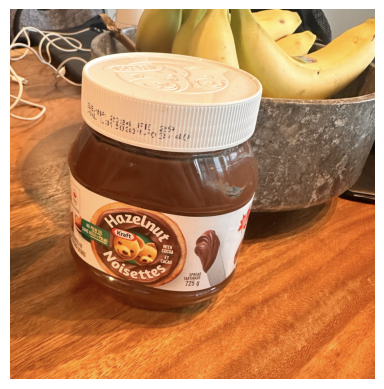

Generated Caption: a jar of nutella sitting on a table next to a bowl of bananas



'a jar of nutella sitting on a table next to a bowl of bananas\n'

In [2]:
caption_and_display_image(model, processor, device, image_path="nutella.jpg")